Name: Larissa Huang (Brainstation Data Science Diploma Candidate) <br>
Contact: lari.huang@gmail.com

Duck Duck Choose: Pecking at Pixels with Machine Learning


In [ ]:

%%javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}setInterval(ClickConnect,60000)

<IPython.core.display.Javascript object>

>[Import Dependencies](#scrollTo=rhPhTy2WcAnc)

>[Data Dictionary](#scrollTo=5f44bfe9)

>[EDA and Data Cleaning](#scrollTo=F92sDV5DeoX5)

>>[Plotting Distribution of Image Counts](#scrollTo=91863927)

>>[Encoding an image as an array](#scrollTo=119a9080)

>[Feature Engineering: Genus](#scrollTo=HHZMBI6MfhH2)

>>[Findings from above:](#scrollTo=66d55dc8)

>>[Adding Genus to Dataframes](#scrollTo=c48a20d7)

>>>[Distribution of number of images grouped by genus](#scrollTo=e116351d)

>>[Findings from above:](#scrollTo=e5e4c545)

>>>>[We know have 5502 rows in the new dataframe, which is the sum of all the image counts for the selected genera: 'DUCK', 'WARBLER', 'PHEASANT', 'KINGFISHER'](#scrollTo=58bfe43c)

>>[Visualize unique species in top 4 genera](#scrollTo=83d1f8c6)

>[Image Preprocessing: Remove Backgrounds](#scrollTo=289bed34)

>>>[Train Set](#scrollTo=262939eb)

>>>>[Duck backgrounds](#scrollTo=66a73f49)

>>>>[Kingfisher backgrounds](#scrollTo=97d57bf5)

>>>>[Pheasant backgrounds](#scrollTo=ec11de58)

>>>>[Warbler backgrounds](#scrollTo=7683ce32)

>>>[Valid Set](#scrollTo=c1f8e828)

>>>>[Duck backgrounds](#scrollTo=d73ca8ab)

>>>>[Kingfisher Backgrounds](#scrollTo=cd0acb29)

>>>>[Pheasant backgrounds](#scrollTo=5f2ea86e)

>>>>[Warbler backgrounds](#scrollTo=72bdb4cb)

>>>[Test set](#scrollTo=8375badb)

>>>>[Duck backgrounds](#scrollTo=495e9e0e)

>>>>[Kingfisher backgrounds](#scrollTo=11f475dd)

>>>>[Pheasant backgrounds](#scrollTo=7dec4ad2)

>>>>[Warbler backgrounds](#scrollTo=e3514b5c)

>>[Checking Class Imbalance](#scrollTo=ac159eb7)

>[Image Preprocessing: Encode as Array](#scrollTo=2f664d75)

>>>[Train set](#scrollTo=6ad9ac0e)

>>>[Valid set](#scrollTo=cdf8a8e6)

>>>[Test set](#scrollTo=0bae3ef6)

>>>[Checking Image Array Shapes and Data Structure](#scrollTo=79b2fdb3)

>[Average Histograms By Genus](#scrollTo=kTGOuuPGBllC)

>>>[DUCK genus average pixel histogram](#scrollTo=vBRpj2CSBzKy)

>>>[KINGFISHER genus average pixel histogram](#scrollTo=hyqo_KrxQ8TV)

>>>[PHEASANT genus average pixel histogram](#scrollTo=hafwtd0LQ-Rl)

>>>[WARBLER genus average pixel histogram](#scrollTo=SETXGUE1Q_QH)

>[Average Histograms By Species In Genus](#scrollTo=ZxY3FgEETBcG)

>>>[Species in Duck Genus](#scrollTo=7dGDFFsYTCpE)

>>>>[HARLEQUIN DUCK](#scrollTo=k8mccgkLTDBm)

>>>>[KNOB BILLED DUCK](#scrollTo=JAR2qIJqTDZQ)

>>>>[MALLARD DUCK](#scrollTo=f42Fh_uRTEL_)

>>>>[MANDRIN DUCK](#scrollTo=yAEc9bktTEjH)

>>>>[RED HEADED DUCK](#scrollTo=Zl69SGjATEz2)

>>>>[SPOTTED WHISTLING DUCK](#scrollTo=OSCAK5VUTFFZ)

>>>>[STEAMER DUCK](#scrollTo=zImFTUk-TFnl)

>>>>[TEAL DUCK](#scrollTo=sF122RDrTGEr)

>>>>[WOOD DUCK](#scrollTo=_8wWtrA-TGV2)

>>>[Species in Kingfisher Genus](#scrollTo=vep6I91-TGsp)

>>>>[WOODLAND KINGFISHER](#scrollTo=iuIGiME4TJXG)

>>>>[PYGMY KINGFISHER](#scrollTo=zGtxealPapdU)

>>>>[CRESTED KINGFISHER](#scrollTo=rMYfVOKLathw)

>>>>[MALACHITE KINGFISHER](#scrollTo=lNKU9RTQavp0)

>>>>[RUDY KINGFISHER](#scrollTo=Ck2XWxvKepW3)

>>>>[RUFOUS KINGFISHER](#scrollTo=ZKfk8e6petTp)

>>>>[BELTED KINGFISHER](#scrollTo=eMUwI3eReu8D)

>>>>[STORK BILLED KINGFISHER](#scrollTo=T8-jPto7e6Ac)

>>>[Species in Pheasant Genus](#scrollTo=_zL3ifI1fLFT)

>>>>[SWINHOES PHEASANT](#scrollTo=FJ1Je--EfK3z)

>>>>[ELLIOTS PHEASANT](#scrollTo=LyJQccndfKro)

>>>>[GOLDEN PHEASANT](#scrollTo=iXYA5rFxfKfH)

>>>>[BULWERS PHEASANT](#scrollTo=aNwcOKeOfKRg)

>>>>[MIKADO PHEASANT](#scrollTo=hxsGmvGVfKDv)

>>>>[BLOOD PHEASANT](#scrollTo=-2QvJuABfJ0G)

>>>>[BORNEAN PHEASANT](#scrollTo=VDTzJ5xQfJUi)

>>>>[RING-NECKED PHEASANT](#scrollTo=djRXKzn7fJIE)

>>>[Species in Warbler Genus](#scrollTo=clc4z2wWgDC4)

>>>>[GOLDEN CHEEKED WARBLER](#scrollTo=PsE6NuOLgF5L)

>>>>[RED FACED WARBLER](#scrollTo=Utz-Lzk3gM2N)

>[Data Augmentation With Image Data Generator](#scrollTo=45e341d6)

>>>[Visualize Data after ImageDataGen](#scrollTo=hJWXhtjNwFBd)

>>>>[Findings From Visualization](#scrollTo=4983825c)

>[CNN model](#scrollTo=86d4d7b4)

>>[Compile and Train the model](#scrollTo=AL7GAVCzT1z9)

>>[Evaluate the model](#scrollTo=f949bcd6)

>>>[Confusion Matrix](#scrollTo=bir1CXTBn0rV)

>>>[Base CNN Model Evaluation:](#scrollTo=8f466e22)

>[Base CNN Model Interpretation and Conclusion](#scrollTo=9gx-XouVqC_1)

>[Next Steps](#scrollTo=97e047aa)



# Import Dependencies

In [2]:
# making sure we have our dependencies
!pip install Pillow
!pip install rembg

# import python packages
import numpy as np
import pandas as pd

# import for plotting
import matplotlib.pyplot as plt

# import to display images
from IPython.display import Image, display

#import remove module
from rembg import remove

#import IMAGE module
from PIL import Image

# import math for setting plot grid size
import math

# import to get image array
import cv2

# import to navigate file system and copy images
import os
import shutil

# import tensorflow
import tensorflow as tf

# import keras
from tensorflow import keras


# import image data generator to preload images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# import specific neural network models & layer types
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# import seaborn
import seaborn as sns

# import confusion matrix
from sklearn.metrics import confusion_matrix

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.5 MB/s eta 0:00:00


In [3]:
! git clone https://github.com/LarissaHuang/capstone_project.git

Cloning into 'capstone_project'...
remote: Enumerating objects: 97440, done.
remote: Counting objects: 100% (5909/5909), done.
remote: Compressing objects: 100% (5894/5894), done.
remote: Total 97440 (delta 18), reused 5905 (delta 14), pack-reused 91531
Receiving objects: 100% (97440/97440), 2.17 GiB | 23.25 MiB/s, done.
Resolving deltas: 100% (36/36), done.
Updating files: 100% (95752/95752), done.


In [4]:
# navigate to the repository directory
os.chdir('/content/capstone_project')

In [5]:
# verify by printing the current working directory
print("Current working directory:", os.getcwd())

Current working directory: /content/capstone_project


# Data Dictionary


<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Description</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>labels</code> </td>
    <td style="text-align: left">bird species associated with the image file</td>
  </tr>
    <tr>
    <td style="text-align: left"><code>scientific label</code></td>
    <td style="text-align: left">scientific name for the bird species</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>filepaths</code></td>
    <td style="text-align: left">the relative file path to an image file</td>
  </tr>
    <tr>
    <td style="text-align: left"><code>data set</code></td>
    <td style="text-align: left">which dataset (train, test or valid) the image filepath belongs to</td>
  </tr>
      <tr>
    <td style="text-align: left"><code>data set</code></td>
    <td style="text-align: left">which dataset (train, test or valid) the image filepath belongs to</td>
  </tr>
       <tr>
    <td style="text-align: left"><code>class_id</code></td>
    <td style="text-align: left">the class index value associated with the image file's class</td>
  </tr>

</table>

#EDA and Data Cleaning

In [5]:
# load in data
df = pd.read_csv('/content/capstone_project/birds.csv')

# take a look at data
df.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


We can see that the dataframe has 4 features of significance: the filepath to the image, the labels which represents the species, the dataset it belongs to, and the scientific name of the species. The class id column contains no relevant information so I will drop it. I will also rename "labels" to "species" because it's more descriptive, and drop the scientific name as the species enough. I will also rename "filepaths" to "path".

In [6]:
# drop class id
df.drop('class id', axis=1, inplace=True)

# rename labels to species
df.rename(columns={'labels': 'species'}, inplace=True)

# drop scientific name column
df.drop('scientific name', axis=1, inplace=True)

# rename filepaths to path
df.rename(columns={'filepaths': 'path'}, inplace=True)

I will be doing the same proprocessing steps for the train, validation and test data sets. To avoid data leakage, I will separate them into their respective dataframes and do further processing separately.

In [7]:
df_train = df[(df["data set"] == "train")]
df_valid = df[(df["data set"] == "valid")]
df_test = df[(df["data set"] == "test")]

In [9]:
print(f'Train set length: {len(df_train)}, Validation set length: {len(df_valid)}, Test set length: {len(df_test)}')

Train set length: 84635, Validation set length: 2625, Test set length: 2625


For all 525 species, the training set has 84635 images, and the validation and the test set have 2625. Now let's look into the image data further.

In [10]:
# find the minimum count of any 'species' in the df_train DataFrame
min_count = df_train['species'].value_counts().min()

# calculate the mean count of 'species' across the df_train DataFrame
mean_count = df_train['species'].value_counts().mean()

# round the mean count to the nearest whole number for readability
mean_count = round(mean_count)

# find the maximum count of any 'species' in the df_train DataFrame
max_count = df_train['species'].value_counts().max()

print(f"min count: {min_count}")
print(f"mean count: {mean_count}")
print(f"max count: {max_count}")

min count: 130
mean count: 161
max count: 263


In [9]:
# group df_train by 'species', count the occurrences of each species in the path column
# reset the index to turn the series into a df and rename the count column to 'count'.
# sort the resulting df by the 'count' column in descending order.
df_species_count = df_train.groupby('species')['path'].count().reset_index(name='count').sort_values(by='count', ascending=False)

# show df that contains the species and their respective counts, sorted from the most to the least common.
df_species_count



,species,count
434,RUFOUS TREPE,263
291,HOUSE FINCH,248
184,D-ARNAUDS BARBET,233
374,OVENBIRD,233
41,ASIAN GREEN BEE EATER,220
...,...,...
453,SNOWY PLOVER,130
382,PATAGONIAN SIERRA FINCH,130
363,NORTHERN RED BISHOP,130
416,RED TAILED THRUSH,130


**Findings from above:**
For the training set, the min count of images for each species is 130, the mean count is 161 and the max count is 263. This isn't a lot of images to work with. Out of 525 species, species with the most numerous image is the Rufous Trepe, with 263 images. This number is insufficient for training a CNN on, so I'll do some further processing before we get to training the model.

Now that each dataframe only has data for one dataset, we can drop the 'data set' column.

In [10]:
# drop redundant column
df_train.drop('data set', axis=1, inplace=True)
df_valid.drop('data set', axis=1, inplace=True)
df_test.drop('data set', axis=1, inplace=True)

# taking a look at df_train
df_train

,path,species
0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER
1,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER
2,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER
3,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER
4,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER
...,...,...
84630,train/BLACK BREASTED PUFFBIRD/151.jpg,BLACK BREASTED PUFFBIRD
84631,train/BLACK BREASTED PUFFBIRD/152.jpg,BLACK BREASTED PUFFBIRD
84632,train/BLACK BREASTED PUFFBIRD/153.jpg,BLACK BREASTED PUFFBIRD
84633,train/BLACK BREASTED PUFFBIRD/146.jpg,BLACK BREASTED PUFFBIRD


In [11]:
# count the occurrences of each unique value in the column
df_grouped = df_train.groupby(['species']).count()

#sort by how many images each species has
sorted_grouped_df = df_grouped.sort_values(by=df_grouped.columns[0], ascending=False)

#rename column
sorted_grouped_df = sorted_grouped_df.rename(columns={'path': 'count'})
sorted_grouped_df

,count
species,
RUFOUS TREPE,263
HOUSE FINCH,248
D-ARNAUDS BARBET,233
OVENBIRD,233
ASIAN GREEN BEE EATER,220
...,...
SNOWY PLOVER,130
PATAGONIAN SIERRA FINCH,130
NORTHERN RED BISHOP,130


<a id='plotting_distribution'></a>
## Plotting Distribution of Image Counts

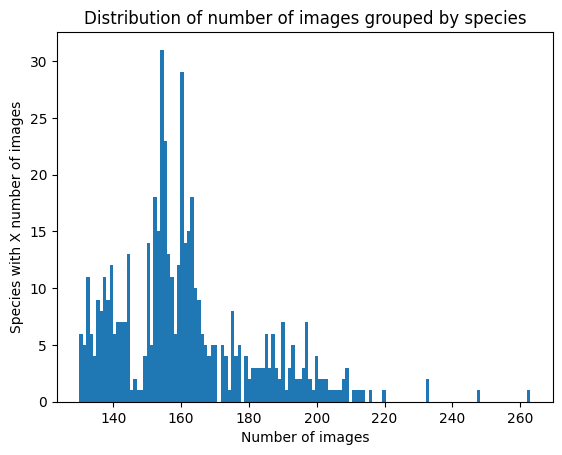

In [ ]:
# copying image counts into new df
img_counts = sorted_grouped_df.copy()

# reset index on new df
img_counts = img_counts.reset_index(drop=True)

species_counts = img_counts["count"]

## plotting the distribution of images across all species to determine which counts are commo
plt.figure()

# bins set to 134 because that is the range between min and max count
plt.hist(species_counts, bins = 134)

plt.title('Distribution of number of images grouped by species')

plt.xlabel('Number of images')

plt.ylabel('Species with X number of images')
plt.show()

**Findings from above:**
This histogram shows that the vast majority of species have fewer than 200 images and there are many species with 150-170 images.  

<a id='encoding_image'></a>
## Encoding an image as an array

As a test, I will encode a single image as an array. I will be reusing this code block and using it to preprocess all images for my CNN later.

In [ ]:
# Define the relative path to the train folder
train_folder = 'train'
image_filename = 'AMETHYST WOODSTAR/018.jpg'

In [ ]:

#saving the path to this particiular image as image_path
image_path = os.path.join(train_folder, image_filename)

#using cv2.imread to reaod the image_path as an array, and saving it to image
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is not None:
    print("Image loaded successfully")
    # Image is already an array
    print(type(image))
    print("Shape:", image.shape)

    # Accessing a pixel value
    pixel_value = image[20, 10]
    print("Pixel value (BGR):", pixel_value)
else:
    print("Failed to load the image")

Image loaded successfully
<class 'numpy.ndarray'>
Shape: (224, 224, 3)
Pixel value (BGR): [ 96 168 175]


array([[[ 95, 165, 172],
        [ 95, 165, 172],
        [ 95, 165, 172],
        ...,
        [143, 189, 200],
        [143, 189, 200],
        [143, 189, 200]],

       [[ 95, 165, 172],
        [ 95, 165, 172],
        [ 95, 165, 172],
        ...,
        [143, 189, 200],
        [143, 189, 200],
        [143, 189, 200]],

       [[ 95, 165, 172],
        [ 95, 165, 172],
        [ 95, 165, 172],
        ...,
        [143, 189, 200],
        [143, 189, 200],
        [143, 189, 200]],

       ...,

       [[ 94, 137, 140],
        [ 94, 137, 140],
        [ 94, 137, 140],
        ...,
        [126, 165, 174],
        [126, 165, 174],
        [126, 165, 174]],

       [[ 93, 136, 139],
        [ 93, 136, 139],
        [ 93, 136, 139],
        ...,
        [125, 164, 173],
        [126, 165, 174],
        [125, 164, 173]],

       [[ 92, 135, 138],
        [ 92, 135, 138],
        [ 93, 136, 139],
        ...,
        [125, 164, 173],
        [125, 164, 173],
        [125, 164, 173]]], dtype=uint8)
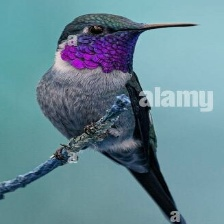

In [ ]:
# printing the image array
image

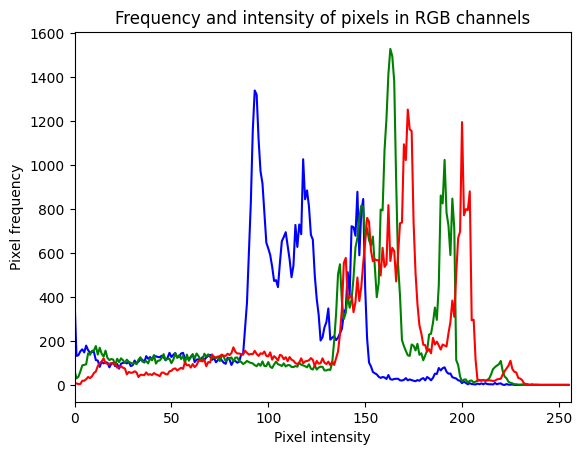

In [ ]:
# find frequency and intensity value for each pixel in the loaded image
for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.title("Frequency and intensity of pixels in RGB channels")
    plt.ylabel("Pixel frequency")
    plt.xlabel("Pixel intensity")
    plt.xlim([0, 256])


plt.show()

**Findings from above:**
The x-axis is the brightness of the pixel where 0 → Black | 255 → White. The y-axis is the frequency of occurence in the image. A higher peak means more of that RGB channel.

The above was part of my preliminary image analysis before deciding to remove image backgrounds to compare average histograms across species and genus.

# Feature Engineering: Genus


Because we have such a low number of images for each species, I decided to combine species into their genus and use genus as a category. That way, I'd have more data per category. My method is to get the last word of each species. For example: Cerulean Warbler is of the genus Warbler. Since I will end up dropping all but the top genuses in terms of image counts of all their constituent species, the rare cases where bird names do not follow this naming convention are not relevant.

In [14]:
# merging dataframes with image counts to preserve the path and species of each bird before we add genus
df_train = pd.merge(df_train, sorted_grouped_df, on='species', how='left')
df_valid =  pd.merge(df_valid, sorted_grouped_df, on='species', how='left')
df_test =  pd.merge(df_test, sorted_grouped_df, on='species', how='left')

In [15]:
# getting the last word from the species name
last_words = df_train['species'].apply(lambda x: x.split()[-1])

# gebt unibque last words
unique_last_words = last_words.unique()

# printing the unique last words
unique_last_words

array(['BABBLER', 'BOOBY', 'HORNBILL', 'CRANE', 'CUCKOO', 'FIREFINCH',
       'CATCHER', 'GOOSE', 'ALBATROSS', 'TOWHEE', 'PARAKEET', 'CHOUGH',
       'YELLOWTHROAT', 'AVOCET', 'BITTERN', 'COOT', 'FLAMINGO',
       'GOLDFINCH', 'KESTREL', 'PIPIT', 'REDSTART', 'ROBIN', 'WIGEON',
       'WOODSTAR', 'LAPWING', 'SISKIN', 'ANHINGA', 'ANIANIAU',
       'HUMMINGBIRD', 'ANTBIRD', 'EUPHONIA', 'APAPANE', 'APOSTLEBIRD',
       'MANAKIN', 'PETREL', 'THRUSHBIRD', 'IBIS', 'BIRD', 'EATER',
       'STORK', 'SHAQ', 'CANASTERO', 'FIGBIRD', 'AVADAVAT', 'SPINETAIL',
       'PITTA', 'JAY', 'TANAGER', 'TIT', 'TEAL', 'EAGLE', 'STARLING',
       'ORIOLE', 'BANANAQUIT', 'GUAN', 'BROADBILL', 'PITA', 'STILT',
       'GODWIT', 'OWL', 'SWALLOW', 'PUFFBIRD', 'GOLDENEYE', 'WARBLER',
       'BARBET', 'BELLBIRD', 'REEDLING', 'KINGFISHER', 'PARADISE', 'BAZA',
       'COCKATO', 'SPOONBILL', 'FRANCOLIN', 'CAIQUE', 'SKIMMER', 'SWAN',
       'CRAKE', 'BUSHTIT', 'HUET', 'SHEARWATER', 'VULTURE', 'CHICKADEE',
       'GREBE', '

In [16]:
# Convert unique_last_words to a DataFrame if it's not already one
unique_last_words = pd.DataFrame(unique_last_words)

# Finding the length of the unique_last_words DataFrame
length = len(unique_last_words)

# Printing the number of genuses in the dataset
print("There are ", length, " genuses in our dataset")

There are  312  genuses in our dataset


## Findings from above:
As you can see, the genus names can be derived with fantastic accuracy using this technique. In future models implementing transfer learning, I will include all genuses and manually label genus values in cases where this 'last word' approach is insufficient.

<a id='adding_genus'></a>
## Adding Genus to Dataframes
Creating a new column "genus" with the last word from the species and adding it to our original dataframes.

In [17]:
# create a new column with genus name for each dataset
df_train['genus'] = df_train['species'].apply(lambda x: x.split()[-1])
df_valid['genus'] = df_valid['species'].apply(lambda x: x.split()[-1])
df_test['genus'] = df_test['species'].apply(lambda x: x.split()[-1])

In [ ]:
# checking df_train
df_train

,path,species,count,genus
0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,163,BABBLER
1,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,163,BABBLER
2,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,163,BABBLER
3,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,163,BABBLER
4,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,163,BABBLER
...,...,...,...,...
84630,train/BLACK BREASTED PUFFBIRD/151.jpg,BLACK BREASTED PUFFBIRD,172,PUFFBIRD
84631,train/BLACK BREASTED PUFFBIRD/152.jpg,BLACK BREASTED PUFFBIRD,172,PUFFBIRD
84632,train/BLACK BREASTED PUFFBIRD/153.jpg,BLACK BREASTED PUFFBIRD,172,PUFFBIRD
84633,train/BLACK BREASTED PUFFBIRD/146.jpg,BLACK BREASTED PUFFBIRD,172,PUFFBIRD


In [19]:
# Assuming 'genus' is the column in df_train that contains genus information
unique_genus = df_train['genus'].unique()

# Convert the unique genus values into a DataFrame
df_unique_genus = pd.DataFrame(unique_genus, columns=['Unique Genus'])

# Display the DataFrame containing unique genus values
df_unique_genus

,Unique Genus
0,BABBLER
1,BOOBY
2,HORNBILL
3,CRANE
4,CUCKOO
...,...
307,DIPPER
308,OILBIRD
309,DUNLIN
310,SHEATHBILL


No charts were generated by quickchart


**Saving genus-labeled dataframes to new csv files**

For future steps using Transfer Learning, I will load labels directly from these new csv files. All-Genus and Simplified 4-Genus .csv files can be saved by selectively running cells. For df with all genuses, exclude cell where "values to keep: DUCK, KINGFISHER, PHEASANT, WARBLER" is applied.

In [ ]:

# df_train.to_csv('df_train_all_genus.csv', index=False)
# df_valid.to_csv('df_valid_all_genus.csv', index=False)
# df_test.to_csv('df_test_all_genus.csv', index=False)

# #download csvs for later use
# from google.colab import files
# files.download('df_train_all_genus.csv')
# files.download('df_valid_all_genus.csv')
# files.download('df_test_all_genus.csv')

Next up is finding out how many images are now in each genus, and which genuses are at the top

In [23]:
# Group by the last word, then aggregate only the 'count' column by summing
aggregated_df_train = df_train.groupby('genus')['count'].count().reset_index()

# Display the aggregated df
sorted_df_train = aggregated_df_train.sort_values(by='count', ascending=False)

# Display the sorted df
sorted_df_train.head(10)

# sorted_df_train

sorted_df_train.to_csv('sorted_df_train.csv', index=False)  # Set index=False if you don't want the index in the file

import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
# Download the file to your local system
from google.colab import files
files.download('sorted_df_train.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Distribution of number of images grouped by genus

In [ ]:
# copying genus image counts into new df
genus_counts = sorted_df_train.copy()

# reset index on new df
genus_counts = genus_counts.reset_index(drop=True)

genus_counts = genus_counts["count"]

## plotting the distribution of images across all genera
plt.figure()

# bins set to 134 because that is the range between min and max count
plt.hist(genus_counts, bins = 500)

plt.title('Distribution of number of images grouped by genus')

plt.xlabel('Number of images')

plt.ylabel('Genus with X number of images')
plt.show()

## Findings from above:
By merging species into genera, we have increased our image counts per category almost tenfold. For the purposes of my base CNN model, I will drop all genuses with fewer than 1200 training images, using only DUCK, WARBLER, PHEASANT, and KINGFISHER. This will serve as a proof of concept as well as decrease the number of images I need to process in my background removal step. When implementing Transfer Learning, I will opt to leave image backgrounds as-is.

In [ ]:
# setting the genus values to keep
values_to_keep = ['DUCK', 'WARBLER', 'PHEASANT', 'KINGFISHER']

# modifying our dataframes to include only our top 4 genera
df_train = df_train[df_train['genus'].isin(values_to_keep)]
df_valid = df_valid[df_valid['genus'].isin(values_to_keep)]
df_test = df_test[df_test['genus'].isin(values_to_keep)]

In [ ]:
# checking our dataframe
df_train

,path,species,count,genus
10405,train/BAY-BREASTED WARBLER/005.jpg,BAY-BREASTED WARBLER,143,WARBLER
10406,train/BAY-BREASTED WARBLER/015.jpg,BAY-BREASTED WARBLER,143,WARBLER
10407,train/BAY-BREASTED WARBLER/002.jpg,BAY-BREASTED WARBLER,143,WARBLER
10408,train/BAY-BREASTED WARBLER/003.jpg,BAY-BREASTED WARBLER,143,WARBLER
10409,train/BAY-BREASTED WARBLER/004.jpg,BAY-BREASTED WARBLER,143,WARBLER
...,...,...,...,...
84259,train/KNOB BILLED DUCK/164.jpg,KNOB BILLED DUCK,197,DUCK
84260,train/KNOB BILLED DUCK/158.jpg,KNOB BILLED DUCK,197,DUCK
84261,train/KNOB BILLED DUCK/157.jpg,KNOB BILLED DUCK,197,DUCK
84262,train/KNOB BILLED DUCK/156.jpg,KNOB BILLED DUCK,197,DUCK


#### We know have 5502 rows in the new dataframe, which is the sum of all the image counts for the selected genera: 'DUCK', 'WARBLER', 'PHEASANT', 'KINGFISHER'

In [ ]:
# seeing how many species each species contributes to the genus count
df_train.groupby("genus")["species"].value_counts()

## Visualize unique species in top 4 genera

In [ ]:

# Group by 'genus' and 'species', then apply a lambda function to sample a random row from each group
sampled_paths = df_train.groupby(['genus', 'species']).apply(lambda x: x.sample(1))

# Reset the index
sampled_paths.reset_index(drop=True, inplace=True)

# Now, 'sampled_paths' will have one random row for each species within each genus
sampled_paths = pd.DataFrame(sampled_paths['path'])

# Calculate the number of images
num_images = len(sampled_paths)

# Determine grid size - create a grid that's as square as possible
grid_size = math.ceil(math.sqrt(num_images))

fig_width = grid_size * 7  # setting fig width
fig_height = grid_size * 7  # 3 setting fig height

# Set up the figure size and grid with the increased figsize
fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(fig_width, fig_height))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the DataFrame and the axes simultaneously
for ax, (index, row) in zip(axes, sampled_paths.iterrows()):
    try:
        img = Image.open(row['path'])  # Load the image from the path
        ax.imshow(img)  # Display the image
        ax.set_title(row['path'], fontsize=20),
        ax.axis('off')  # Turn off the axis
    except FileNotFoundError:
        ax.axis('off')  # If the file is not found, just hide the axis

# If there are any remaining subplots in the grid, hide them
for ax in axes[num_images:]:
    ax.axis('off')

plt.show()


# Image Preprocessing: Remove Backgrounds

To remove image backgrounds, I iterated over image files in the source folder and used the remove function from `rembg` to remove backgrounds. After removing their backgrounds, I saved the processed images as .png files back to their original location and deleted the original .jpg file so there would be no duplicates.

### Train Set

#### Duck backgrounds

In [ ]:
# Define the input directory
input_dir = '/content/capstone_project/train-genus/DUCK'

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith('.jpg'):  # check for .jpg files to process
        print(f"Processing {filename}...")
        input_path = os.path.join(input_dir, filename)

        # Create a new filename with a .png extension
        name, ext = os.path.splitext(filename)
        output_filename = f"{name}.png"  # format output transparent image as .png
        output_path = os.path.join(input_dir, output_filename)

        # Open the image, remove the background, and save the result
        with open(input_path, 'rb') as input_file:
            input_image = input_file.read()
            output_image = remove(input_image)

        # Save the output image
        with open(output_path, 'wb') as output_file:
            output_file.write(output_image)
        print(f"Saved processed image as {output_filename}")

        os.remove(input_path)
        print(f"Deleted original image {filename}")


#### Kingfisher backgrounds

In [ ]:
# Define the input directory
input_dir = '/content/capstone_project/train-genus/KINGFISHER'

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith('.jpg'):  # check for .jpg files to process
        print(f"Processing {filename}...")
        input_path = os.path.join(input_dir, filename)

        # Create a new filename with a .png extension
        name, ext = os.path.splitext(filename)
        output_filename = f"{name}.png"  # format output transparent image as .png
        output_path = os.path.join(input_dir, output_filename)

        # Open the image, remove the background, and save the result
        with open(input_path, 'rb') as input_file:
            input_image = input_file.read()
            output_image = remove(input_image)

        # Save the output image
        with open(output_path, 'wb') as output_file:
            output_file.write(output_image)
        print(f"Saved processed image as {output_filename}")

        os.remove(input_path)
        print(f"Deleted original image {filename}")

#### Pheasant backgrounds

In [ ]:
# Define the input directory
input_dir = '/content/capstone_project/train-genus/PHEASANT'

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith('.jpg'):  # check for .jpg files to process
        print(f"Processing {filename}...")
        input_path = os.path.join(input_dir, filename)

        # Create a new filename with a .png extension
        name, ext = os.path.splitext(filename)
        output_filename = f"{name}.png"  # format output transparent image as .png
        output_path = os.path.join(input_dir, output_filename)

        # Open the image, remove the background, and save the result
        with open(input_path, 'rb') as input_file:
            input_image = input_file.read()
            output_image = remove(input_image)

        # Save the output image
        with open(output_path, 'wb') as output_file:
            output_file.write(output_image)
        print(f"Saved processed image as {output_filename}")

        os.remove(input_path)
        print(f"Deleted original image {filename}")

#### Warbler backgrounds

In [ ]:
# Define the input directory
input_dir = '/content/capstone_project/train-genus/WARBLER'

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith('.jpg'):  # check for .jpg files to process
        print(f"Processing {filename}...")
        input_path = os.path.join(input_dir, filename)

        # Create a new filename with a .png extension
        name, ext = os.path.splitext(filename)
        output_filename = f"{name}.png"  # format output transparent image as .png
        output_path = os.path.join(input_dir, output_filename)

        # Open the image, remove the background, and save the result
        with open(input_path, 'rb') as input_file:
            input_image = input_file.read()
            output_image = remove(input_image)

        # Save the output image
        with open(output_path, 'wb') as output_file:
            output_file.write(output_image)
        print(f"Saved processed image as {output_filename}")

        os.remove(input_path)
        print(f"Deleted original image {filename}")

### Valid Set

#### Duck backgrounds

In [ ]:
# Define the input directory
input_dir = '/content/capstone_project/valid-genus/DUCK'

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith('.jpg'):  # check for .jpg files to process
        print(f"Processing {filename}...")
        input_path = os.path.join(input_dir, filename)

        # Create a new filename with a .png extension
        name, ext = os.path.splitext(filename)
        output_filename = f"{name}.png"  # format output transparent image as .png
        output_path = os.path.join(input_dir, output_filename)

        # Open the image, remove the background, and save the result
        with open(input_path, 'rb') as input_file:
            input_image = input_file.read()
            output_image = remove(input_image)

        # Save the output image
        with open(output_path, 'wb') as output_file:
            output_file.write(output_image)
        print(f"Saved processed image as {output_filename}")

        os.remove(input_path)
        print(f"Deleted original image {filename}")

#### Kingfisher Backgrounds

In [ ]:
# Define the input directory
input_dir = '/content/capstone_project/valid-genus/KINGFISHER'

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith('.jpg'):  # check for .jpg files to process
        print(f"Processing {filename}...")
        input_path = os.path.join(input_dir, filename)

        # Create a new filename with a .png extension
        name, ext = os.path.splitext(filename)
        output_filename = f"{name}.png"  # format output transparent image as .png
        output_path = os.path.join(input_dir, output_filename)

        # Open the image, remove the background, and save the result
        with open(input_path, 'rb') as input_file:
            input_image = input_file.read()
            output_image = remove(input_image)

        # Save the output image
        with open(output_path, 'wb') as output_file:
            output_file.write(output_image)
        print(f"Saved processed image as {output_filename}")

        os.remove(input_path)
        print(f"Deleted original image {filename}")

#### Pheasant backgrounds

In [ ]:
# Define the input directory
input_dir = '/content/capstone_project/valid-genus/PHEASANT'

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith('.jpg'):  # check for .jpg files to process
        print(f"Processing {filename}...")
        input_path = os.path.join(input_dir, filename)

        # Create a new filename with a .png extension
        name, ext = os.path.splitext(filename)
        output_filename = f"{name}.png"  # format output transparent image as .png
        output_path = os.path.join(input_dir, output_filename)

        # Open the image, remove the background, and save the result
        with open(input_path, 'rb') as input_file:
            input_image = input_file.read()
            output_image = remove(input_image)

        # Save the output image
        with open(output_path, 'wb') as output_file:
            output_file.write(output_image)
        print(f"Saved processed image as {output_filename}")

        os.remove(input_path)
        print(f"Deleted original image {filename}")

#### Warbler backgrounds

In [ ]:
# Define the input directory
input_dir = '/content/capstone_project/valid-genus/WARBLER'

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith('.jpg'):  # check for .jpg files to process
        print(f"Processing {filename}...")
        input_path = os.path.join(input_dir, filename)

        # Create a new filename with a .png extension
        name, ext = os.path.splitext(filename)
        output_filename = f"{name}.png"  # format output transparent image as .png
        output_path = os.path.join(input_dir, output_filename)

        # Open the image, remove the background, and save the result
        with open(input_path, 'rb') as input_file:
            input_image = input_file.read()
            output_image = remove(input_image)

        # Save the output image
        with open(output_path, 'wb') as output_file:
            output_file.write(output_image)
        print(f"Saved processed image as {output_filename}")

        os.remove(input_path)
        print(f"Deleted original image {filename}")

### Test set

#### Duck backgrounds

In [ ]:
# Define the input directory
input_dir = '/content/capstone_project/test-genus/DUCK'

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith('.jpg'):  # check for .jpg files to process
        print(f"Processing {filename}...")
        input_path = os.path.join(input_dir, filename)

        # Create a new filename with a .png extension
        name, ext = os.path.splitext(filename)
        output_filename = f"{name}.png"  # format output transparent image as .png
        output_path = os.path.join(input_dir, output_filename)

        # Open the image, remove the background, and save the result
        with open(input_path, 'rb') as input_file:
            input_image = input_file.read()
            output_image = remove(input_image)

        # Save the output image
        with open(output_path, 'wb') as output_file:
            output_file.write(output_image)
        print(f"Saved processed image as {output_filename}")

        os.remove(input_path)
        print(f"Deleted original image {filename}")

#### Kingfisher backgrounds

In [ ]:
# Define the input directory
input_dir = '/content/capstone_project/test-genus/KINGFISHER'

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith('.jpg'):  # check for .jpg files to process
        print(f"Processing {filename}...")
        input_path = os.path.join(input_dir, filename)

        # Create a new filename with a .png extension
        name, ext = os.path.splitext(filename)
        output_filename = f"{name}.png"  # format output transparent image as .png
        output_path = os.path.join(input_dir, output_filename)

        # Open the image, remove the background, and save the result
        with open(input_path, 'rb') as input_file:
            input_image = input_file.read()
            output_image = remove(input_image)

        # Save the output image
        with open(output_path, 'wb') as output_file:
            output_file.write(output_image)
        print(f"Saved processed image as {output_filename}")

        os.remove(input_path)
        print(f"Deleted original image {filename}")

#### Pheasant backgrounds

In [ ]:
# Define the input directory
input_dir = '/content/capstone_project/test-genus/PHEASANT'

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith('.jpg'):  # check for .jpg files to process
        print(f"Processing {filename}...")
        input_path = os.path.join(input_dir, filename)

        # Create a new filename with a .png extension
        name, ext = os.path.splitext(filename)
        output_filename = f"{name}.png"  # format output transparent image as .png
        output_path = os.path.join(input_dir, output_filename)

        # Open the image, remove the background, and save the result
        with open(input_path, 'rb') as input_file:
            input_image = input_file.read()
            output_image = remove(input_image)

        # Save the output image
        with open(output_path, 'wb') as output_file:
            output_file.write(output_image)
        print(f"Saved processed image as {output_filename}")

        os.remove(input_path)
        print(f"Deleted original image {filename}")

#### Warbler backgrounds

In [ ]:
# Define the input directory
input_dir = '/content/capstone_project/test-genus/WARBLER'

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith('.jpg'):  # check for .jpg files to process
        print(f"Processing {filename}...")
        input_path = os.path.join(input_dir, filename)

        # Create a new filename with a .png extension
        name, ext = os.path.splitext(filename)
        output_filename = f"{name}.png"  # format output transparent image as .png
        output_path = os.path.join(input_dir, output_filename)

        # Open the image, remove the background, and save the result
        with open(input_path, 'rb') as input_file:
            input_image = input_file.read()
            output_image = remove(input_image)

        # Save the output image
        with open(output_path, 'wb') as output_file:
            output_file.write(output_image)
        print(f"Saved processed image as {output_filename}")

        os.remove(input_path)
        print(f"Deleted original image {filename}")

<a id='class-imbalance'></a>
## Checking Class Imbalance

Prior to implementing a base CNN model, I want to check the class imbalances of my datasets.

In [ ]:
# using the image path as our X_train, as it's the data the model will use to predict class
X_train = df_train["path"]

# setting genus as the y, as it's the class we want to predict
y_train = df_train["genus"]

# check class distribution
y_train.value_counts(normalize=True)

DUCK          0.274446
WARBLER       0.252817
PHEASANT      0.236823
KINGFISHER    0.235914
Name: genus, dtype: float64

In [ ]:
# using the image path as our X_valid, as it's the data the model will use to predict class
X_valid = df_valid["path"]

# setting genus as the y, as it's the class we want to predict
y_valid = df_valid["genus"]

# check class distribution
y_valid.value_counts(normalize=True)

WARBLER       0.264706
DUCK          0.264706
KINGFISHER    0.235294
PHEASANT      0.235294
Name: genus, dtype: float64

In [ ]:
# using the image path as our X_test, as it's the data the model will use to test its class predictions
X_test = df_test["path"]

# setting genus as the y, as it's the class we want to predict
y_test = df_test["genus"]

# check class distribution
y_test.value_counts(normalize=True)

WARBLER       0.264706
DUCK          0.264706
KINGFISHER    0.235294
PHEASANT      0.235294
Name: genus, dtype: float64


**Findings from abovet**

The dataset contains images classified into 4 different genuses. All values are approximately within 23%-27%, so there is only a slight class imbalance in our datasets. DUCK is the most common genus in the training set, while WARBLER is the most common genus in our valid and test sets.

Given the distribution, models trained on this dataset might perform slightly better on recognizing DUCK images compared to KINGFISHER images, due to the higher proportion of DUCK images in the training data. Efforts to balance the dataset or apply weighted loss functions can be utilized in the subsequent iterations to mitigate potential bias.

In [ ]:
# prompt: remove all contents of folders called "EAGLE"

import os
import shutil

# Define the directories to remove
directories = ["/content/capstone_project/train-genus/EAGLE",
               "/content/capstone_project/valid-genus/EAGLE",
               "/content/capstone_project/test-genus/EAGLE"]

# Remove the directories and their contents
for directory in directories:
  if os.path.exists(directory):
    shutil.rmtree(directory)


In [ ]:
# prompt: remove all folders called 'EAGLE'

# Define the directories to remove
directories = ["/content/capstone_project/train-genus/EAGLE",
               "/content/capstone_project/valid-genus/EAGLE",
               "/content/capstone_project/test-genus/EAGLE"]

# Remove the directories and their contents
for directory in directories:
  if os.path.exists(directory):
    shutil.rmtree(directory)


# Image Preprocessing: Encode as Array

Since a Keras model expects image data input to be passed in as a 4D tensor, such that:

image.shape should be in form: (n_images, img_rows, img_cols, n_channels)

I will do some preprocessing on the images so that they are in array form before passing into the model. Reusing the same code I used earlier to output one image's array, I will use the imread() function from the cv2 library to get all the images in my train-genus folder as an array, then repeat for valid-genus and test-genus.

### Train set

In [13]:
base_path = '/content/capstone_project/train-genus'  # Base directory containing subfolders with images

train_images = []  # List to hold all image arrays

# Walk through all directories and subdirectories in the base_path
for root, dirs, files in os.walk(base_path):
    for file in files:
        # Construct the full path to the image
        image_path = os.path.join(root, file)

        # Load the image
        image = cv2.imread(image_path)

        # Check if the image was loaded correctly
        if image is not None:

            # The dataset came with images that were 224x224, but resizing here just to be sure
            image = cv2.resize(image, (224, 224))

            # Add the image array to the list
            train_images.append(image)
        else:
            print(f"Failed to load the image at path: {image_path}")

# At this point, 'images' is a list of NumPy arrays, each array representing an image
# The list does not preserve any folder structure, effectively flattening it

print(f"Total images loaded: {len(train_images)}")

# converting images to an array
train_images = np.array(train_images)

# now it's an array
type(train_images)

Total images loaded: 5502


numpy.ndarray

### Valid set

In [14]:
base_path = '/content/capstone_project/valid-genus'  # Base directory containing subfolders with images
valid_images = []  # List to hold all valid image arrays

# Walk through all directories and subdirectories in the base_path
for root, dirs, files in os.walk(base_path):
    for file in files:
        # Construct the full path to the image
        image_path = os.path.join(root, file)

        # Load the image
        image = cv2.imread(image_path)

        # Check if the image was loaded correctly
        if image is not None:

            # The dataset came with images that were 224x224, but resizing here just to be sure
            image = cv2.resize(image, (224, 224))

            # Add the image array to the list
            valid_images.append(image)
        else:
            print(f"Failed to load the image at path: {image_path}")

# At this point, 'images' is a list of NumPy arrays, each array representing an image
# The list does not preserve any folder structure, effectively flattening it

print(f"Total images loaded: {len(valid_images)}")

# converting images to an array
valid_images = np.array(valid_images)

# now it's an array
type(valid_images)

Total images loaded: 170


numpy.ndarray

### Test set

In [15]:
base_path = '/content/capstone_project/test-genus'  # Base directory containing subfolders with images
test_images = []  # List to hold all valid image arrays

# Walk through all directories and subdirectories in the base_path
for root, dirs, files in os.walk(base_path):
    for file in files:
        # Construct the full path to the image
        image_path = os.path.join(root, file)

        # Load the image
        image = cv2.imread(image_path)

        # Check if the image was loaded correctly
        if image is not None:

            # The dataset came with images that were 224x224, but resizing here just to be sure
            image = cv2.resize(image, (224, 224))

            # Add the image array to the list
            test_images.append(image)
        else:
            print(f"Failed to load the image at path: {image_path}")

# At this point, 'images' is a list of NumPy arrays, each array representing an image
# The list does not preserve any folder structure, effectively flattening it

print(f"Total images loaded: {len(test_images)}")

# converting images to an array
test_images = np.array(test_images)

# now it's an array
type(test_images)

Total images loaded: 170


numpy.ndarray

### Checking Image Array Shapes and Data Structure
After converting images into arrays, I want to confirm the shapes and data structures are appropriate for next steps.

In [19]:
# checking the length of train images array
print(f"Length of train images array: {len(train_images)}")

# setting a new X_train_images to equal our train images array
X_train_images = train_images

print(f"X_train_images shape: {X_train_images.shape}")

print()  # newline for separation
# checking the length of validation images array
print(f"Length of valid images array: {len(valid_images)}")

# setting a new X_valid_images to equal our valid_images array
X_valid_images = valid_images

print(f"X_valid_images shape: {X_valid_images.shape}")

print()  # newline for separation

# checking the length of test images array
print(f"Length of test images array: {len(test_images)}")

# setting a new X_test_images to equal our test_images array
X_test_images = test_images

print(f"X_test_images shape: {X_test_images.shape}")

Length of train images array: 5502
X_train_images shape: (5502, 224, 224, 3)

Length of valid images array: 170
X_valid_images shape: (170, 224, 224, 3)

Length of test images array: 170
X_test_images shape: (170, 224, 224, 3)


**Summary**

The shape of the datasets is now appropriate to pass to the model. The array lengths are also correct. Our X-range is also appropriate for colour image data, and y values and classes are correct as well

# Average Histograms By Genus
Plotting the average histogram values for each target class (genus) provides an easily interpretable visual of how much variability is in the data that the model is being trained on.  It can be help us see that the model is learning from a diverse and representative sample of each class. In order to do this, I will first convert all images in each genus to an array using the `cv2` library, then use numpy to get the sum of histograms for each colour channel across the genus, then divide by number of images in each genus to derive the average histogram for each colour channel.

### DUCK genus average pixel histogram


In [1]:
import cv2

base_path = '/content/capstone_project/train-genus/DUCK'  # Base directory containing subfolders with images

duck_images = []  # List to hold all image arrays

# Walk through all directories and subdirectories in the base_path
for root, dirs, files in os.walk(base_path):
    for file in files:
        # Construct the full path to the image
        image_path = os.path.join(root, file)

        # Load the image
        image = cv2.imread(image_path)

        # Check if the image was loaded correctly
        if image is not None:
            # The dataset came with images that were 224x224, but resizing here just to be sure
            image = cv2.resize(image, (224, 224))

            # Convert to RGB color space
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Add the image array to the list
            duck_images.append(image)
        else:
            print(f"Failed to load the image at path: {image_path}")


print(f"Total images loaded: {len(duck_images)}")

# Initialize sum of histograms for each color channel
sum_hist = [np.zeros(256), np.zeros(256), np.zeros(256)]

# Calculate the histogram for each image and sum them
for image in duck_images:
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256]).flatten()
        sum_hist[i] += hist

# Calculate the average histograms
avg_hist = [h / len(duck_images) for h in sum_hist]

# Plot the average histogram for each color channel
colors = ['r', 'g', 'b']
plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Duck Genus")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')
for i, col in enumerate(colors):
    plt.plot(avg_hist[i], color=col, label=f"{col.upper()} channel")
plt.legend()
plt.xlim([0, 256])
plt.show()


NameError: name 'os' is not defined

### KINGFISHER genus average pixel histogram

In [ ]:
base_path = '/content/capstone_project/train-genus/KINGFISHER'  # Base directory containing subfolders with images

kingfisher_images = []  # List to hold all image arrays

# Walk through all directories and subdirectories in the base_path
for root, dirs, files in os.walk(base_path):
    for file in files:
        # Construct the full path to the image
        image_path = os.path.join(root, file)

        # Load the image
        image = cv2.imread(image_path)

        # Check if the image was loaded correctly
        if image is not None:
            # The dataset came with images that were 224x224, but resizing here just to be sure
            image = cv2.resize(image, (224, 224))

            # Convert to RGB color space
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Add the image array to the list
            kingfisher_images.append(image)
        else:
            print(f"Failed to load the image at path: {image_path}")


print(f"Total images loaded: {len(kingfisher_images)}")

# Initialize sum of histograms for each color channel
sum_hist = [np.zeros(256), np.zeros(256), np.zeros(256)]

# Calculate the histogram for each image and sum them
for image in kingfisher_images:
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256]).flatten()
        sum_hist[i] += hist

# Calculate the average histograms
avg_hist = [h / len(kingfisher_images) for h in sum_hist]

# Plot the average histogram for each color channel
colors = ['r', 'g', 'b']
plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Kingfisher Genus")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')
for i, col in enumerate(colors):
    plt.plot(avg_hist[i], color=col, label=f"{col.upper()} channel")
plt.legend()
plt.xlim([0, 256])
plt.show()


### PHEASANT genus average pixel histogram

In [ ]:
base_path = '/content/capstone_project/train-genus/PHEASANT'  # Base directory containing subfolders with images

pheasant_images = []  # List to hold all image arrays

# Walk through all directories and subdirectories in the base_path
for root, dirs, files in os.walk(base_path):
    for file in files:
        # Construct the full path to the image
        image_path = os.path.join(root, file)

        # Load the image
        image = cv2.imread(image_path)

        # Check if the image was loaded correctly
        if image is not None:
            # The dataset came with images that were 224x224, but resizing here just to be sure
            image = cv2.resize(image, (224, 224))

            # Convert to RGB color space
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Add the image array to the list
            pheasant_images.append(image)
        else:
            print(f"Failed to load the image at path: {image_path}")


print(f"Total images loaded: {len(pheasant_images)}")

# Initialize sum of histograms for each color channel
sum_hist = [np.zeros(256), np.zeros(256), np.zeros(256)]

# Calculate the histogram for each image and sum them
for image in pheasant_images:
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256]).flatten()
        sum_hist[i] += hist

# Calculate the average histograms
avg_hist = [h / len(pheasant_images) for h in sum_hist]

# Plot the average histogram for each color channel
colors = ['r', 'g', 'b']
plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Pheasant Genus")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')
for i, col in enumerate(colors):
    plt.plot(avg_hist[i], color=col, label=f"{col.upper()} channel")
plt.legend()
plt.xlim([0, 256])
plt.show()

### WARBLER genus average pixel histogram

In [ ]:
base_path = '/content/capstone_project/train-genus/WARBLER'  # Base directory containing subfolders with images

warbler_images = []  # List to hold all image arrays

# Walk through all directories and subdirectories in the base_path
for root, dirs, files in os.walk(base_path):
    for file in files:
        # Construct the full path to the image
        image_path = os.path.join(root, file)

        # Load the image
        image = cv2.imread(image_path)

        # Check if the image was loaded correctly
        if image is not None:
            # The dataset came with images that were 224x224, but resizing here just to be sure
            image = cv2.resize(image, (224, 224))

            # Convert to RGB color space
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Add the image array to the list
            warbler_images.append(image)
        else:
            print(f"Failed to load the image at path: {image_path}")


print(f"Total images loaded: {len(warbler_images)}")

# Initialize sum of histograms for each color channel
sum_hist = [np.zeros(256), np.zeros(256), np.zeros(256)]

# Calculate the histogram for each image and sum them
for image in warbler_images:
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256]).flatten()
        sum_hist[i] += hist

# Calculate the average histograms
avg_hist = [h / len(warbler_images) for h in sum_hist]

# Plot the average histogram for each color channel
colors = ['r', 'g', 'b']
plt.title("Average Frequency and Intensity of Pixels in RGB Channels in Warbler Genuswa")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')
for i, col in enumerate(colors):
    plt.plot(avg_hist[i], color=col, label=f"{col.upper()} channel")
plt.legend()
plt.xlim([0, 256])
plt.show()

# Average Histograms By Species In Genus
 Analyzing average pixel histograms for each species in each genus can provide insights into how similar or different species within one genus are. This can help us understand our model's decisions and perhaps give insight into how the model can be improved.



### Species in Duck Genus

#### HARLEQUIN DUCK

In [ ]:
# Define the base directory where the files are located
base_dir = '/content/capstone_project/train-genus/DUCK'

# Initialize an empty array for species image files
harlequin_duck_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'HARLEQUIN DUCK' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            harlequin_duck_images.append(full_path)

# Convert the list to a NumPy array
harlequin_duck_images = np.array(harlequin_duck_images)


#####################

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(harlequin_duck_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in harlequin_duck_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Harlequin Ducks")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')
plt.xlim([0, 256])
plt.show()


#### KNOB BILLED DUCK

In [ ]:
# Define the base directory where the files are located
base_dir = '/content/capstone_project/train-genus/DUCK/'

# Initialize an empty array for species image files
knob_billed_duck_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'KNOB BILLED DUCK' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            knob_billed_duck_images.append(full_path)

# Convert the list to a NumPy array
knob_billed_duck_images = np.array(knob_billed_duck_images)


#####################

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(knob_billed_duck_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in knob_billed_duck_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Knob Billed Ducks")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()


#### MALLARD DUCK

In [ ]:
# Define the base directory where the files are located
base_dir = '/content/capstone_project/train-genus/DUCK/'

# Initialize an empty array for species image files
mallard_duck_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'MALLARD DUCK' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            mallard_duck_images.append(full_path)

# Convert the list to a NumPy array
mallard_duck_images = np.array(mallard_duck_images)


#####################

# Assuming mallard_duck_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(mallard_duck_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in mallard_duck_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Mallard Ducks")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()


#### MANDRIN DUCK

In [ ]:
# Define the base directory where the files are located
base_dir = '/content/capstone_project/train-genus/DUCK/'

# Initialize an empty array for species image files
mandrin_duck_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'MANDRIN DUCK' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            mandrin_duck_images.append(full_path)

# Convert the list to a NumPy array
mandrin_duck_images = np.array(mandrin_duck_images)


#####################

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(mandrin_duck_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in mandrin_duck_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Mandarin Ducks")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt



#### RED HEADED DUCK

In [ ]:

# Define the base directory where the files are located
base_dir = '/content/capstone_project/train-genus/DUCK/'

# Initialize an empty array for species image files
red_headed_duck_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'RED HEADED DUCK' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            red_headed_duck_images.append(full_path)

# Convert the list to a NumPy array
red_headed_duck_images = np.array(red_headed_duck_images)


#####################

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(red_headed_duck_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in red_headed_duck_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Red Headed Ducks")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()



#### SPOTTED WHISTLING DUCK

In [ ]:
# Define the base directory where the files are located
base_dir = '/content/capstone_project/train-genus/DUCK/'

# Initialize an empty array for species image files
spotted_whistling_duck_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'SPOTTED WHISTLING DUCK' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            spotted_whistling_duck_images.append(full_path)

# Convert the list to a NumPy array
spotted_whistling_duck_images = np.array(spotted_whistling_duck_images)


#####################

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(spotted_whistling_duck_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in spotted_whistling_duck_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Spotted Whistling Ducks")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()



#### STEAMER DUCK

In [ ]:

# Define the base directory where the files are located
base_dir = '/content/capstone_project/train-genus/DUCK/'

# Initialize an empty array for species image files
steamer_duck_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'STEAMER DUCK' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            steamer_duck_images.append(full_path)

# Convert the list to a NumPy array
steamer_duck_images = np.array(steamer_duck_images)


#####################

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(steamer_duck_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in steamer_duck_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Steamer Ducks")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()


#### TEAL DUCK

In [ ]:
# Define the base directory where the files are located
base_dir = '/content/capstone_project/train-genus/DUCK/'

# Initialize an empty array for species image files
teal_duck_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'TEAL DUCK' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            teal_duck_images.append(full_path)

# Convert the list to a NumPy array
teal_duck_images = np.array(teal_duck_images)


#####################

# Assuming teal_duck_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(teal_duck_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in teal_duck_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Teal Ducks")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()


#### WOOD DUCK

In [ ]:

# Define the base directory where the files are located
base_dir = '/content/capstone_project/train-genus/DUCK/'

# Initialize an empty array for species image files
wood_duck_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'WOOD DUCK' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            wood_duck_images.append(full_path)

# Convert the list to a NumPy array
wood_duck_images = np.array(wood_duck_images)


#####################

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(wood_duck_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in wood_duck_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Wood Ducks")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()



### Species in Kingfisher Genus

#### WOODLAND KINGFISHER

In [ ]:
# Define the base directory where the files are located
base_dir = '/content/capstone_project/train-genus/KINGFISHER/'

# Initialize an empty array for species image files
woodland_kingfisher_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'WOODLAND KINGFISHER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            woodland_kingfisher_images.append(full_path)

# Convert the list to a NumPy array
woodland_kingfisher_images = np.array(woodland_kingfisher_images)

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(woodland_kingfisher_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in woodland_kingfisher_images:
    # Check if "WOODLAND KINGFISHER" is in the file name
    if 'WOODLAND KINGFISHER' not in image_path.upper():
        continue

    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Woodland Kingfishers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()



#### PYGMY KINGFISHER

In [ ]:

base_dir = '/content/capstone_project/train-genus/KINGFISHER/'

# Initialize an empty array for species image files
pygmy_kingfisher_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'PYGMY KINGFISHER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            pygmy_kingfisher_images.append(full_path)

# Convert the list to a NumPy array
pygmy_kingfisher_images = np.array(pygmy_kingfisher_images)

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(pygmy_kingfisher_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in pygmy_kingfisher_images:
    # Check if "PYGMY KINGFISHER" is in the file name
    if 'PYGMY KINGFISHER' not in image_path.upper():
        continue

    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Pygmy Kingfishers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()



#### CRESTED KINGFISHER

In [ ]:
base_dir = '/content/capstone_project/train-genus/KINGFISHER/'
# Initialize an empty array for species image files
crested_kingfisher_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'CRESTED KINGFISHER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            crested_kingfisher_images.append(full_path)

# Convert the list to a NumPy array
crested_kingfisher_images = np.array(crested_kingfisher_images)

# Assuming crested_kingfisher_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(crested_kingfisher_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in crested_kingfisher_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Crested Kingfishers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()




#### MALACHITE KINGFISHER

In [ ]:
base_dir = '/content/capstone_project/train-genus/KINGFISHER/'
# Initialize an empty array for species image files
malachite_kingfisher_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'MALACHITE KINGFISHER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            malachite_kingfisher_images.append(full_path)

# Convert the list to a NumPy array
malachite_kingfisher_images = np.array(malachite_kingfisher_images)

# Assuming malachite_kingfisher_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(malachite_kingfisher_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in malachite_kingfisher_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Malachite Kingfishers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()




#### RUDY KINGFISHER

In [ ]:

base_dir = '/content/capstone_project/train-genus/KINGFISHER/'
# Initialize an empty array for species image files
rudy_kingfisher_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'RUDY KINGFISHER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            rudy_kingfisher_images.append(full_path)

# Convert the list to a NumPy array
rudy_kingfisher_images = np.array(rudy_kingfisher_images)

# Assuming rudy_kingfisher_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(rudy_kingfisher_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in rudy_kingfisher_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Rudy Kingfishers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()




#### RUFOUS KINGFISHER

In [ ]:

base_dir = '/content/capstone_project/train-genus/KINGFISHER/'
# Initialize an empty array for species image files
rufous_kingfisher_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'RUFOUS KINGFISHER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            rufous_kingfisher_images.append(full_path)

# Convert the list to a NumPy array
rufous_kingfisher_images = np.array(rufous_kingfisher_images)

# Assuming rufous_kingfisher_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(rufous_kingfisher_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in rufous_kingfisher_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Rufous Kingfishers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()





#### BELTED KINGFISHER

In [ ]:

base_dir = '/content/capstone_project/train-genus/KINGFISHER/'
# Initialize an empty array for species image files
belted_kingfisher_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'BELTED KINGFISHER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            belted_kingfisher_images.append(full_path)

# Convert the list to a NumPy array
belted_kingfisher_images = np.array(belted_kingfisher_images)

# Assuming belted_kingfisher_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(belted_kingfisher_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in belted_kingfisher_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Belted Kingfishers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()





#### STORK BILLED KINGFISHER

In [ ]:

base_dir = '/content/capstone_project/train-genus/KINGFISHER/'
# Initialize an empty array for species image files
stork_billed_kingfisher_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'STORK BILLED KINGFISHER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            stork_billed_kingfisher_images.append(full_path)

# Convert the list to a NumPy array
stork_billed_kingfisher_images = np.array(stork_billed_kingfisher_images)

# Assuming stork_billed_kingfisher_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(stork_billed_kingfisher_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in stork_billed_kingfisher_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Stork Billed Kingfishers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()



### Species in Pheasant Genus

#### SWINHOES PHEASANT

In [ ]:
base_dir = '/content/capstone_project/train-genus/PHEASANT/'
# Initialize an empty array for species image files
swinhoes_pheasant_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'SWINHOES PHEASANT' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            swinhoes_pheasant_images.append(full_path)

# Convert the list to a NumPy array
swinhoes_pheasant_images = np.array(swinhoes_pheasant_images)


#####################
# Assuming swinhoes_pheasant_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(swinhoes_pheasant_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in swinhoes_pheasant_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Swinhoe's Pheasants")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()



#### ELLIOTS PHEASANT

In [ ]:

base_dir = '/content/capstone_project/train-genus/PHEASANT/'
# Initialize an empty array for species image files
elliots_pheasant_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'ELLIOTS  PHEASANT' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            elliots_pheasant_images.append(full_path)

# Convert the list to a NumPy array
elliots_pheasant_images = np.array(elliots_pheasant_images)


#####################
# Assuming elliot_pheasant_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(elliots_pheasant_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in elliots_pheasant_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Elliots Pheasants")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()



#### GOLDEN PHEASANT

In [ ]:

base_dir = '/content/capstone_project/train-genus/PHEASANT/'
# Initialize an empty array for species image files
golden_pheasant_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'GOLDEN PHEASANT' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            golden_pheasant_images.append(full_path)

# Convert the list to a NumPy array
golden_pheasant_images = np.array(golden_pheasant_images)


#####################

# Assuming golden_pheasant_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(golden_pheasant_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in golden_pheasant_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Golden Pheasants")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()


#### BULWERS PHEASANT

In [ ]:

base_dir = '/content/capstone_project/train-genus/PHEASANT/'
# Initialize an empty array for species image files
bulwers_pheasant_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'BULWERS PHEASANT' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            bulwers_pheasant_images.append(full_path)

# Convert the list to a NumPy array
bulwers_pheasant_images = np.array(bulwers_pheasant_images)


#####################
# Assuming bulwers_pheasant_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(bulwers_pheasant_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in bulwers_pheasant_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Bulwers Pheasants")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()



#### MIKADO PHEASANT

In [ ]:

base_dir = '/content/capstone_project/train-genus/PHEASANT/'
# Initialize an empty array for species image files
mikado_pheasant_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'MIKADO  PHEASANT' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            mikado_pheasant_images.append(full_path)

# Convert the list to a NumPy array
mikado_pheasant_images = np.array(mikado_pheasant_images)


#####################

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(mikado_pheasant_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in mikado_pheasant_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Mikado Pheasants")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()


#### BLOOD PHEASANT

In [ ]:

base_dir = '/content/capstone_project/train-genus/PHEASANT/'
# Initialize an empty array for species image files
blood_pheasant_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'BLOOD PHEASANT' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            blood_pheasant_images.append(full_path)

# Convert the list to a NumPy array
blood_pheasant_images = np.array(blood_pheasant_images)


#####################

# Assuming blood_pheasant_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(blood_pheasant_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in blood_pheasant_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Blood Pheasants")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()


#### BORNEAN PHEASANT

In [ ]:

base_dir = '/content/capstone_project/train-genus/PHEASANT/'
# Initialize an empty array for species image files
bornean_pheasant_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'BORNEAN PHEASANT' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            bornean_pheasant_images.append(full_path)

# Convert the list to a NumPy array
bornean_pheasant_images = np.array(bornean_pheasant_images)


#####################
# Assuming bornean_pheasant_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(bornean_pheasant_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in bornean_pheasant_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Bornean Pheasants")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()



#### RING-NECKED PHEASANT

In [ ]:

base_dir = '/content/capstone_project/train-genus/PHEASANT/'
# Initialize an empty array for species image files
ring_necked_pheasant_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'RING-NECKED PHEASANT' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            ring_necked_pheasant_images.append(full_path)

# Convert the list to a NumPy array
ring_necked_pheasant_images = np.array(ring_necked_pheasant_images)


#####################
# Assuming ring_necked_pheasant_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(ring_necked_pheasant_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in ring_necked_pheasant_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Ring-Necked Pheasants")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()



### Species in Warbler Genus

#### GOLDEN CHEEKED WARBLER

In [ ]:

base_dir = '/content/capstone_project/train-genus/WARBLER/'
# Initialize an empty array for species image files
golden_cheeked_warbler_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'GOLDEN CHEEKED WARBLER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            golden_cheeked_warbler_images.append(full_path)

# Convert the list to a NumPy array
golden_cheeked_warbler_images = np.array(golden_cheeked_warbler_images)


#####################

# Assuming golden_cheeked_warbler_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(golden_cheeked_warbler_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in golden_cheeked_warbler_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Golden-Cheeked Warblers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()


#### RED FACED WARBLER

In [ ]:

base_dir = '/content/capstone_project/train-genus/WARBLER/'
# Initialize an empty array for species image files
red_faced_warbler_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'RED FACED WARBLER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            red_faced_warbler_images.append(full_path)

# Convert the list to a NumPy array
red_faced_warbler_images = np.array(red_faced_warbler_images)


#####################

# Assuming red_faced_warbler_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(red_faced_warbler_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in red_faced_warbler_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Red-Faced Warblers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()


TOWNSENDS WARBLER

In [ ]:

base_dir = '/content/capstone_project/train-genus/WARBLER/'
# Initialize an empty array for species image files
townsends_warbler_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'TOWNSENDS WARBLER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            townsends_warbler_images.append(full_path)

# Convert the list to a NumPy array
townsends_warbler_images = np.array(townsends_warbler_images)


#####################
# Assuming townsends_warbler_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(townsends_warbler_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in townsends_warbler_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Townsends Warblers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()


CERULEAN WARBLER

In [ ]:

base_dir = '/content/capstone_project/train-genus/WARBLER/'
# Initialize an empty array for species image files
cerulean_warbler_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'CERULEAN WARBLER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            cerulean_warbler_images.append(full_path)

# Convert the list to a NumPy array
cerulean_warbler_images = np.array(cerulean_warbler_images)


#####################

# Assuming cerulean_warbler_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(cerulean_warbler_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in cerulean_warbler_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Cerulean Warblers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()


GOLD WING WARBLER

In [ ]:

base_dir = '/content/capstone_project/train-genus/WARBLER/'
# Initialize an empty array for species image files
gold_wing_warbler_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'GOLD WING WARBLER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            gold_wing_warbler_images.append(full_path)

# Convert the list to a NumPy array
gold_wing_warbler_images = np.array(gold_wing_warbler_images)


#####################
# Assuming gold_wing_warbler_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(gold_wing_warbler_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in gold_wing_warbler_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Gold Wing Warblers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()


CAPE MAY WARBLER

In [ ]:

base_dir = '/content/capstone_project/train-genus/WARBLER/'
# Initialize an empty array for species image files
cape_may_warbler_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'CAPE MAY WARBLER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            cape_may_warbler_images.append(full_path)

# Convert the list to a NumPy array
cape_may_warbler_images = np.array(cape_may_warbler_images)


#####################
# Assuming cape_may_warbler_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(cape_may_warbler_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in cape_may_warbler_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Cape May Warblers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()


BAY-BREASTED WARBLER

In [ ]:

base_dir = '/content/capstone_project/train-genus/WARBLER/'
# Initialize an empty array for species image files
bay_breasted_warbler_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'BAY-BREASTED WARBLER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            bay_breasted_warbler_images.append(full_path)

# Convert the list to a NumPy array
bay_breasted_warbler_images = np.array(bay_breasted_warbler_images)


#####################
# Assuming bay_breasted_warbler_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(bay_breasted_warbler_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in bay_breasted_warbler_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Bay-Breasted Warblers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()


BLACK THROATED WARBLER

In [ ]:

base_dir = '/content/capstone_project/train-genus/WARBLER/'
# Initialize an empty array for species image files
black_throated_warbler_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'BLACK THROATED WARBLER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            black_throated_warbler_images.append(full_path)

# Convert the list to a NumPy array
black_throated_warbler_images = np.array(black_throated_warbler_images)


#####################

# Assuming black_throated_warbler_images is defined and contains image paths

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(black_throated_warbler_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in black_throated_warbler_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Black Throated Warblers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()



BLACKBURNIAM WARBLER

In [ ]:

base_dir = '/content/capstone_project/train-genus/WARBLER/'
# Initialize an empty array for species image files
blackburniam_warbler_images = []

# Walk through the directory
for root, dirs, files in os.walk(base_dir):
    # Loop through the files in the current directory
    for file in files:
        # Check if the species is in the file name
        if 'BLACKBURNIAM WARBLER' in file:
            # Construct the full path to the file
            full_path = os.path.join(root, file)
            # Add the full path to the list
            blackburniam_warbler_images.append(full_path)

# Convert the list to a NumPy array
blackburniam_warbler_images = np.array(blackburniam_warbler_images)


#####################

# Initialize sums for each color channel
sum_hist = {'r': np.zeros(256), 'g': np.zeros(256), 'b': np.zeros(256)}
num_images = len(blackburniam_warbler_images)

# Check if there are any images to process
if num_images == 0:
    raise ValueError("No images found in the list.")

# For each image file path in the array
for image_path in blackburniam_warbler_images:
    # Read the image file into an array, ignoring the alpha channel if present
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate and accumulate the histogram for each color channel
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        sum_hist[col] += hist.flatten()

# Calculate the average histogram for each color channel
avg_hist = {col: hist_sum / num_images for col, hist_sum in sum_hist.items()}

# Plot the average histograms
plt.figure(figsize=(10, 6))
for col in ['r', 'g', 'b']:
    plt.plot(avg_hist[col], color=col)

plt.title("Average Frequency and Intensity of Pixels in RGB Channels for Blackburniam Warblers")
plt.ylabel("Average Pixel Frequency")
plt.xlabel("Pixel Intensity")
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize differences
plt.xlim([0, 256])
plt.show()



<a id='data-augmentation'></a>
# Data Augmentation With Image Data Generator
Our data sets already have their 4D shapes correctly defined for modeling with Keras, so we can move ahead to loading ImageDataGenerator, which performs the follow data augmentation steps: scales pixel values to between 0 and 1 to help the model learn faster, rotates images up to 40 degrees to handle tilted objects, moves them up to 20% side-to-side or up-and-down to mimic different object locations, slants images for shape variation, zooms in or out by 20% for size variation, and flips images side-to-side to learn from mirrored views.

In [22]:

# Specify the dimensions we want our images to be preprocessed to
# (This will allow us to images of different resolutions)
height = 224
width = 224
channels = 3

# Create training image data generator.
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize the images
    rotation_range=40,    # Rotate the images up to 40 degrees
    width_shift_range=0.2, # Shift the images horizontally by up to 20%
    height_shift_range=0.2,# Shift the images vertically by up to 20%
    shear_range=0.2,      # Shear transformation
    zoom_range=0.2,       # Zoom in/out
    horizontal_flip=True, # Allow horizontal flipping
    fill_mode='nearest'   # Strategy for filling in newly created pixels
)

# Create validation image data generator.
# Only apply rescaling to our validation data.
validation_datagen = ImageDataGenerator(rescale=1./255)

# Finally we specify where the images should be loaded from as well as some additional attributes:
train_generator=train_datagen.flow_from_directory('/content/capstone_project/train-genus',
                                                 target_size=(height,width),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='sparse')


validation_generator=validation_datagen.flow_from_directory('/content/capstone_project/valid-genus',
                                                 target_size=(height,width),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='sparse')



Found 5502 images belonging to 4 classes.
Found 170 images belonging to 4 classes.


The following code will print the class labels and their corresponding indices.

In [23]:
class_indices = train_generator.class_indices
print(class_indices)


{'DUCK': 0, 'KINGFISHER': 1, 'PHEASANT': 2, 'WARBLER': 3}


After the generator has been initialized with flow_from_directory, it will have a class_indices attribute that is a dictionary mapping class names to class indices. I will invert this dictionary to get a mapping from indices to class names:

In [24]:
# Invert the class_indices dictionary to get a mapping from indices to class names
index_to_class = {v: k for k, v in train_generator.class_indices.items()}


I can now use this mapping to display readable class names as labels when visualizing my images

<a id='visualize'></a>
### Visualize Data after ImageDataGen

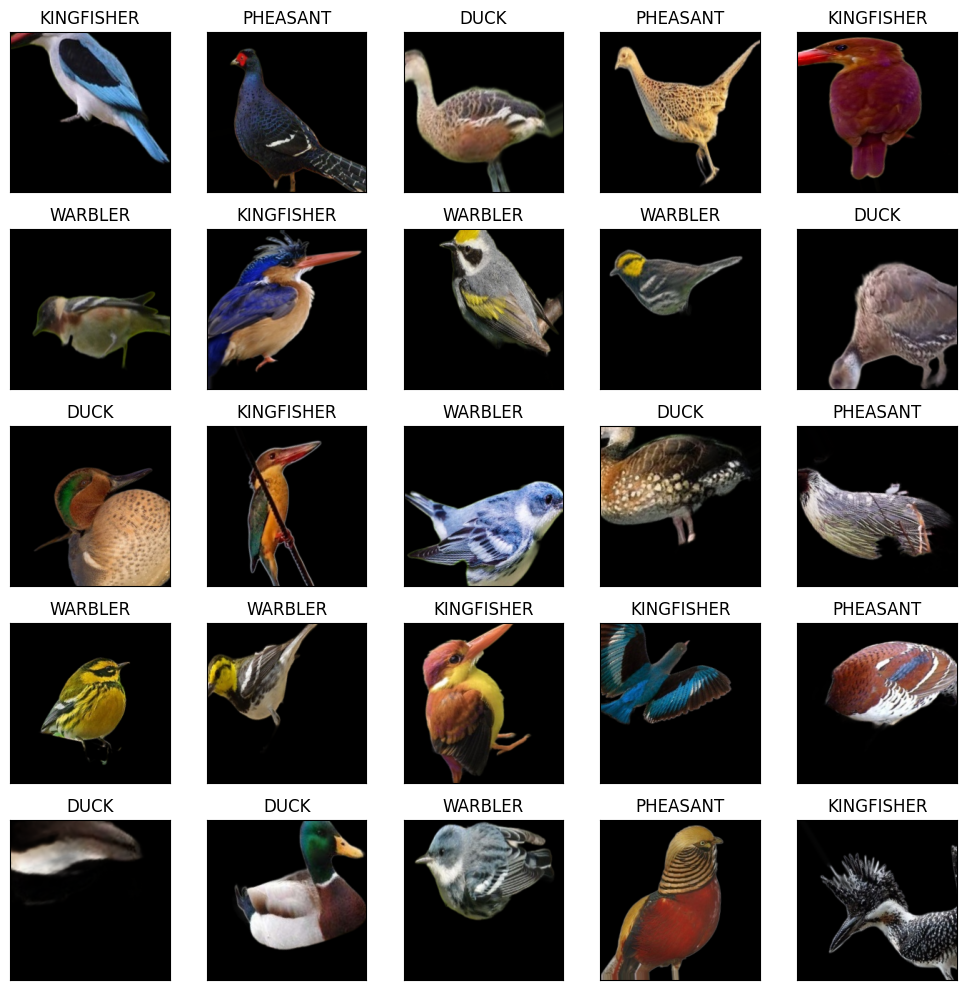

In [ ]:
x_batch, y_batch = train_generator.next()

# Define the dimensions of the grid
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

# Set up the matplotlib figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
axes = axes.flatten()

for i in range(num_images):
    # Plot image
    img = x_batch[i]
    ax = axes[i]
    ax.imshow(img)

    # Add human-readable label as the title
    label = index_to_class[y_batch[i]]
    ax.set_title(label)

    # Hide the axes ticks
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


<a id='findings-from-visualization'></a>
#### Findings From Visualization

After running the batch several times and confirming the images do belong to the genus label they are tagged with, I am confident that the data generator has correctly labeled the image data


# CNN model

The first step is to construct the model architecture, using the easiest way, which is to build each layer  build each layer sequentially using the Keras sequential model API. This allows us to simply construct each layer one at a time by adding them to this Sequential model. Pooling layers reduce dimensionality. This Convolution + Pooling sequence is repeated until the dimensionality has been lowered enough.At this point, the output of is flattened to prepare it for the final hidden layers. After our data is flattened, we will typically have a few dense layers. These dense layers will use the features that were learned from the convolutional layers to make the final prediction. As usual, the final prediction layer has its output size set to the number of classes. Dropout is also commonly used in CNNs as a form of regularization to reduce over-fitting.


In [25]:
# initialize a Sequential model as a linear stack of layers
CNN_model = Sequential()

# number of unique classes in the dataset
num_classes = 4

# add a convolutional layer with 32 filters of size 3x3, 'relu' activation, and define input shape
CNN_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))

# add a max-pooling layer with a 2x2 window to reduce spatial dimensions
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

# add a dropout layer to prevent overfitting by randomly setting 25% of the inputs to 0
CNN_model.add(Dropout(0.25))

# add another convolutional layer with 64 filters of size 3x3 and 'relu' activation
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))

# add another max-pooling layer to further reduce spatial dimensions
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

# add another dropout layer for regularization
CNN_model.add(Dropout(0.25))

# flatten the output to 1D to prepare for the dense layers
CNN_model.add(Flatten())

# add a dense layer with 128 neurons and 'relu' activation for pattern recognition
CNN_model.add(Dense(128, activation='relu'))

# add another dense layer with 64 neurons and 'relu' activation
CNN_model.add(Dense(64, activation='relu'))

# add the output layer with 'num_classes' neurons and 'softmax' activation for class probabilities
CNN_model.add(Dense(num_classes, activation='softmax'))

# print a summary of the model architecture
CNN_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

## Compile and Train the model

Now to compile the model with the desired loss function, optimizer, and metrics to track, then fit the model on training data. I set an early stopping callback to stop training once we no longer have improvements in our validation loss, with the patience set to 6 epochs which means the training process will continue for 6 more epochs without improvement in the monitored metric. "Restore best weights" means the model reverts to its best performance state during training, ensuring optimal effectiveness despite later declines.

In [27]:

# my class labels are integer indices so I set class_mode='sparse' in my train_generator
# therefore, I will compile my model with 'sparse_categorical_crossentropy':
CNN_model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

# Use an early stopping callback to stop training once we no longer have improvements in our validation loss
early_stop = EarlyStopping(monitor='val_loss',
                           patience=6,
                           mode='min',
                           verbose=1,
                           # model weights will revert to those from the epoch with the best value of the monitored metric upon early stopping.
                           restore_best_weights=True)

# Fit the model on the training data, defining desired batch_size & number of epochs,
# running validation after each batch
CNN_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
172/172 [==============================] - 69s 395ms/step - loss: 0.9318 - accuracy: 0.6296 - val_loss: 0.5871 - val_accuracy: 0.8059
Epoch 2/10
172/172 [==============================] - 68s 395ms/step - loss: 0.7922 - accuracy: 0.6939 - val_loss: 0.5451 - val_accuracy: 0.8176
Epoch 3/10
172/172 [==============================] - 68s 396ms/step - loss: 0.7044 - accuracy: 0.7310 - val_loss: 0.4300 - val_accuracy: 0.8235
Epoch 4/10
172/172 [==============================] - 68s 394ms/step - loss: 0.6269 - accuracy: 0.7686 - val_loss: 0.4745 - val_accuracy: 0.8176
Epoch 5/10
172/172 [==============================] - 68s 395ms/step - loss: 0.5718 - accuracy: 0.7794 - val_loss: 0.4938 - val_accuracy: 0.7706
Epoch 6/10
172/172 [==============================] - 69s 401ms/step - loss: 0.5450 - accuracy: 0.7983 - val_loss: 0.3383 - val_accuracy: 0.8824
Epoch 7/10
172/172 [==============================] - 68s 394ms/step - loss: 0.5584 - accuracy: 0.7895 - val_loss: 0.2747 - val_ac

<a id='evaluate_performance_test'></a>
## Evaluate the model

For our final evaluation, we will explore the performance of the model on the test set. To do this, we need to use the evaluate and the predict method on the model. However, there is one important step to carry out first: these methods need, as input, a flow of images generated by a data generator just like we did for the training steps. To accomplish this, we will create another ImageDataGenerator for our test data. In order to simplify our code, we will use a batch size of 170 (the total number of images in our test set).

In [28]:
# Apply the same rescaling factor as our other generators
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('test-genus',
                                                  target_size=(height,width),
                                                  color_mode='rgb',
                                                  batch_size=170,
                                                  class_mode='sparse')

X_test, y_test = test_generator.next()

Found 170 images belonging to 4 classes.


In [29]:
#score the model on test data
score = CNN_model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

6/6 [==============================] - 0s 10ms/step - loss: 0.3580 - accuracy: 0.8706
Test loss: 0.35795459151268005
Test accuracy: 0.8705882430076599


**Test Accuracy**
Our model's accuracy is 87%. Since test accuracy is slightly higher than training accuracy of 83%, it could indicate that the model might be slightly underfitted, where it's too simple to capture the underlying pattern in the training data but performs well on the simpler patterns in the test set.

### Confusion Matrix

6/6 [==============================] - 0s 8ms/step


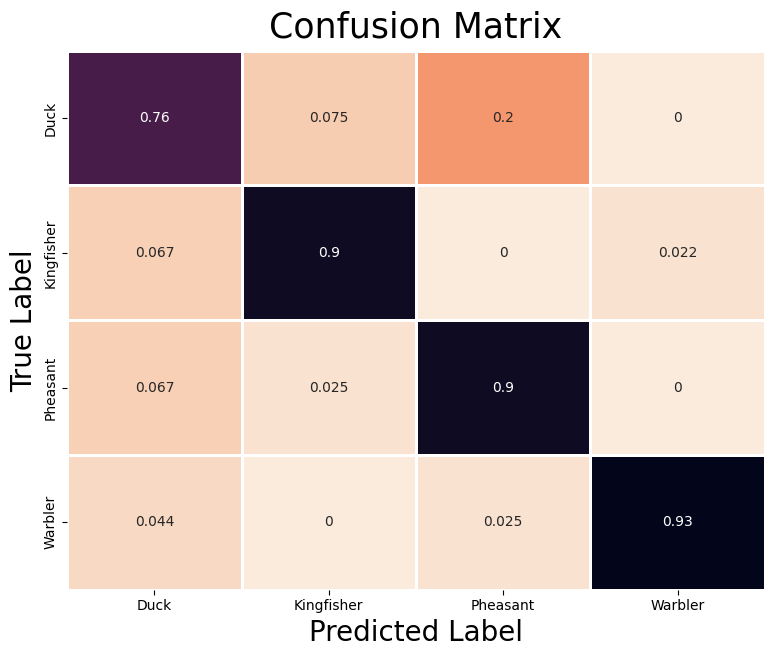

In [30]:
from sklearn.metrics import confusion_matrix

genus_names = ['Duck',
                'Kingfisher',
                'Pheasant',
                'Warbler']


# Calculate the predicted labels for each test image.
predict_probas = CNN_model.predict(X_test)
y_predict = np.argmax(predict_probas, axis=1)

# Calculate the predicted labels for each test image.
predict_probas = CNN_model.predict(X_test)
y_predict = np.argmax(predict_probas, axis=1)

# Create the confusion matrix using sklearn
conf_mat = confusion_matrix(y_test, y_predict)

# Since we have many images, it is helpful to show our
# results as fractions of the total number of images
# for each class.
normalized_conf_mat = conf_mat / conf_mat.sum(axis=1)

plt.figure(figsize = (9,7))
sns.heatmap(normalized_conf_mat,
            annot=True,
            cbar=False,
            xticklabels=genus_names,
            yticklabels=genus_names,
            cmap="rocket_r",
            linewidths=1
           )
plt.title('Confusion Matrix',size = 25,y=1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

Confusion Matrix Interpretation:
The base CNN model does the best at predicting Warblers at 93% accuracy, and the worst at predicting Ducks, with 76% accuracy.

# Incorrectly Predicted Images

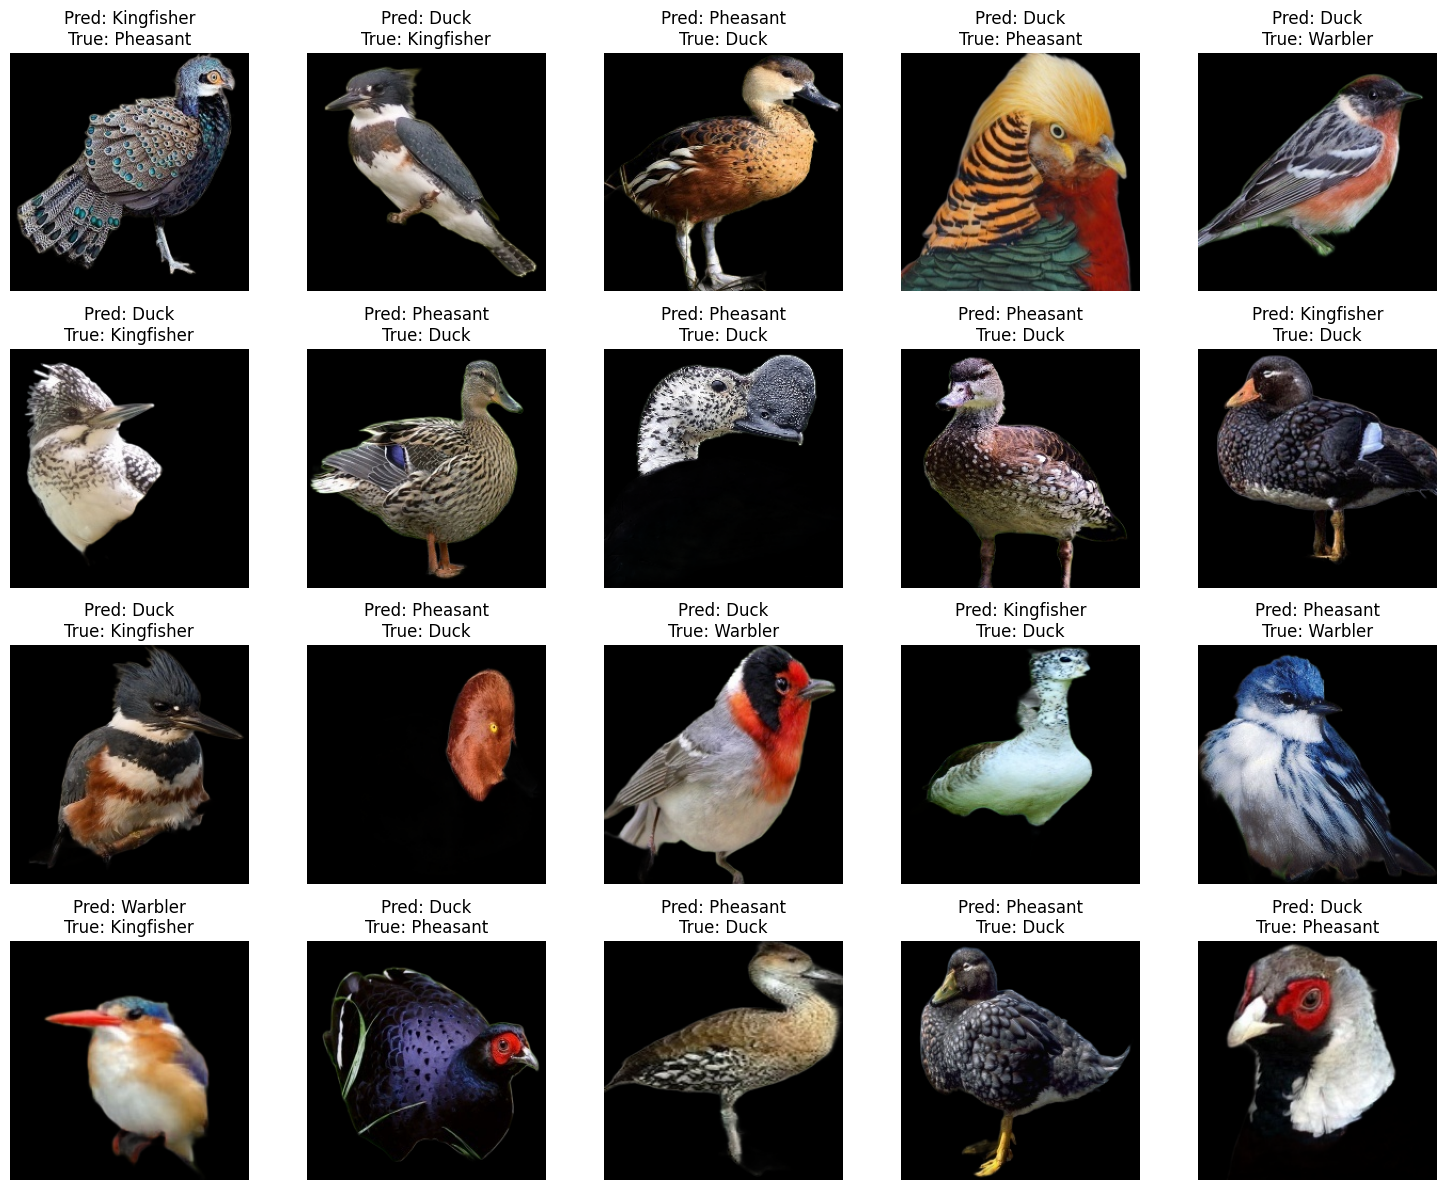

In [31]:
incorrect_indices = np.where(y_predict != y_test)[0]
num_images = min(20, len(incorrect_indices))  # Display up to 20 images
fig, axes = plt.subplots(nrows=num_images//5, ncols=5, figsize=(15, num_images//5 * 3))
for idx, ax in zip(incorrect_indices[:num_images], axes.flatten()):
    ax.imshow(X_test[idx], cmap='gray')
    ax.set_title(f"Pred: {genus_names[int(y_predict[idx])]}\nTrue: {genus_names[int(y_test[idx])]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Base CNN Model Interpretation and Conclusion

Based on a visual analysis, the model might have incorrectly predicted these images because the colours of the bird may have been very similar to other birds in the genus that the model predicted it to be. For example, the 2nd image is a Pheasant with a yellow colour similar to a typical Warbler, so the model may have predicted it as a Warbler for that reason. Size and shape may also play a role.

# Next Steps
I want to see how much improvement a pre-trained model can provide, so in my next steps, I will implement transfer learning by leveraging pre-trained weights from a CNN model like EfficientNet.

Mount to Google Drive

In [33]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/capstone_project"

Mounted at /content/drive


Saving the model

In [34]:
!pip install pyyaml h5py

In [35]:
CNN_model.save('CNN_model.h5')

In [36]:
from google.colab import files
files.download('CNN_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>